In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import NS_tidalcapture as tc


%matplotlib inline

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/PULSAR2/tc_comparison/'

2.1.2


In [11]:
def addColorbar(
    ax,cmap,
    vmin,vmax,
    label,logflag = 0,
    fontsize=16,cmap_number=0,
    tick_tuple=None):
    if logflag:
        from matplotlib.colors import LogNorm as norm
        ticks = np.linspace(np.log10(vmin),np.log10(vmax),5,endpoint=True)
        tick_labels= [r"$10^{%.1f}$"%tick for tick in ticks]
        ticks = 10**ticks
    else:
        from matplotlib.colors import Normalize as norm
        ticks = np.linspace(vmin,vmax,5,endpoint=True)
        tick_labels= ticks
    
    if tick_tuple is not None:
        ticks,tick_labels = tick_tuple

    fig = ax.get_figure()
    
    ## x,y of bottom left corner, width,height in percentage of figure size
    ## matches the default aspect ratio of matplotlib
    cur_size = fig.get_size_inches()*fig.dpi        

    cur_height = cur_size[1]
    cur_width = cur_size[0]
    offset = 0.00 + cmap_number*(25/cur_width+50/cur_width)

    ax1 = fig.add_axes([0.95 + offset, 0.125, 25./cur_width, 0.75])

    cb1 = matplotlib.colorbar.ColorbarBase(
        ax1, cmap=cmap,
        #extend='both',
        extendfrac=0.05,
        norm=norm(vmin=vmin,vmax=vmax),
        orientation='vertical')


    cb1.set_label(label,fontsize=fontsize)

    cb1.set_ticks(ticks)
    cb1.set_ticklabels(tick_labels)
    cb1.ax.tick_params(labelsize=fontsize-2)
    return cb1,ax1

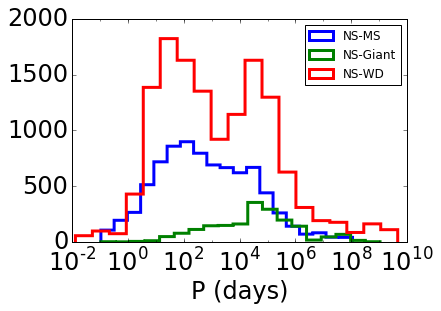

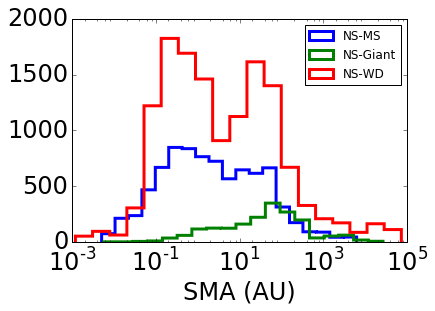

In [24]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)

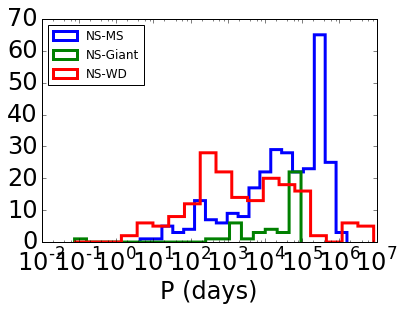

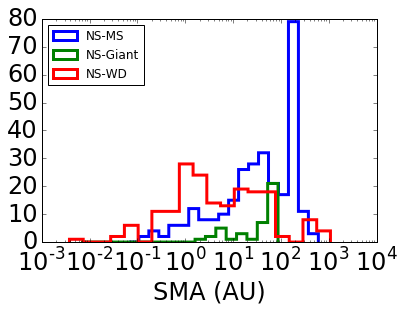

In [19]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 2)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})

0
10858 265 20
1331 5 1
3975 361 43


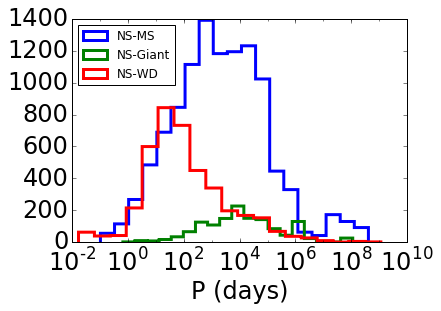

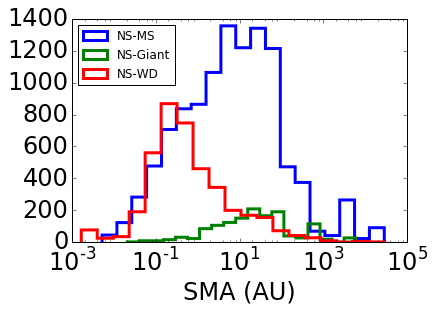

In [4]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)

9652
[0.9999634662, 0.9999930002, 0.999955566, 0.9999779334]


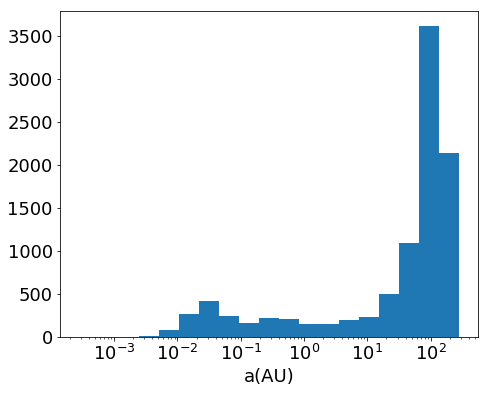

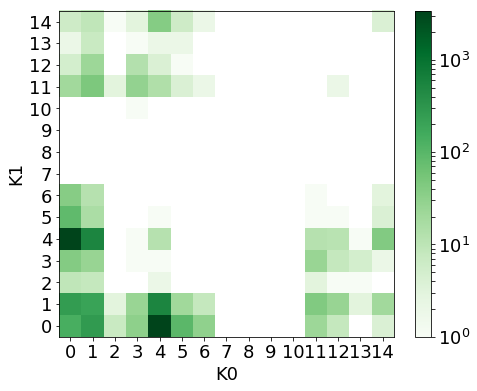

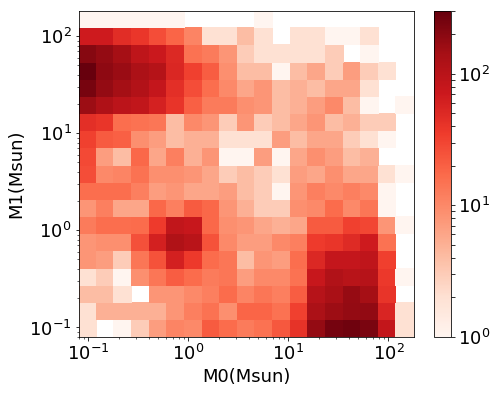

In [63]:
##Types and masses and final properties of ss tidal captures
##All the tidal captures in the tidal capture file
M0, M1, K0, K1, A, E=tc.find_tc_types('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir/8e5rv0.5rg8z0.002/')

print(len(M0))

print([x for x in E if x > 0])

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7.5,6]

plt.figure()
plt.hist(A, bins=np.logspace(np.log10(min(A)),np.log10(max(A)), 20))
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('a(AU)')


K0=[x - 0.5 for x in K0]
K1=[Y - 0.5 for Y in K1]
plt.figure()
ax=plt.gca()
plt.hist2d(K0, K1, bins=np.arange(16)-0.5, norm=mpl.colors.LogNorm(), cmap='Greens')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('K0')
plt.ylabel('K1')
plt.colorbar()

xbins=np.logspace(np.log10(min(M0)),np.log10(max(M0)), 20)
ybins=np.logspace(np.log10(min(M1)),np.log10(max(M1)), 20)
counts, _, _ = np.histogram2d(M0, M1, bins=(xbins, ybins))
plt.figure()
plt.pcolormesh(xbins, ybins, counts.T, norm=mpl.colors.LogNorm(), cmap='Reds')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M0(Msun)')
plt.ylabel('M1(Msun)')
plt.colorbar()

Text(0,0.5,'B(G)')

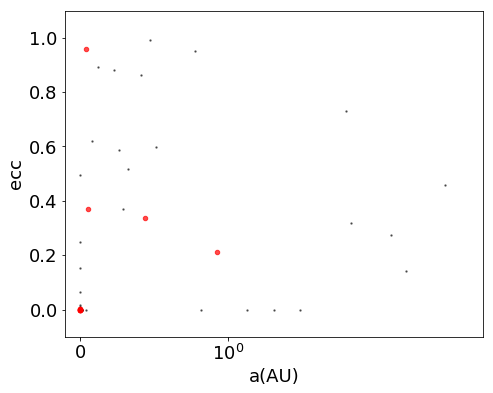

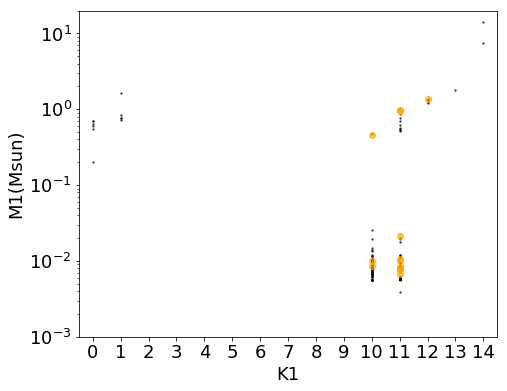

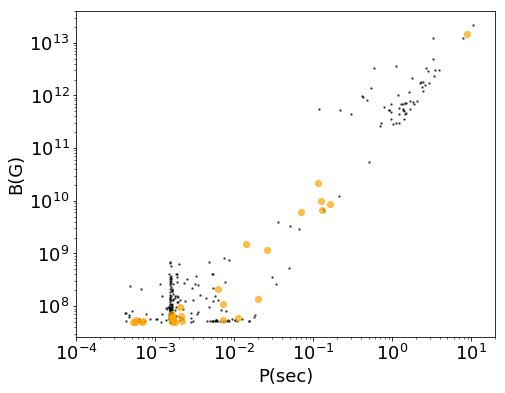

In [80]:
##Pulsar compainon types and masses and pulsar properties from the main grid models compare to the new test model
##with tidal capture implemented

datamsp=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/finaldata/msp_maingrid_last.dat')
datapsr=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/finaldata/normalpsr_maingrid_last.dat')

main={'m0': list(datamsp[:,10])+list(datapsr[:,10]), 'm1': list(datamsp[:,11])+list(datapsr[:,11]), 
     'k0': list(datamsp[:,14])+list(datapsr[:,14]), 'k1': list(datamsp[:,15])+list(datapsr[:,15]), 
     'a': list(datamsp[:,16])+list(datapsr[:,16]), 'e': list(datamsp[:,17])+list(datapsr[:,17]), 
     'B': list(datamsp[:,4])+list(datapsr[:,4]), 'P': list(datamsp[:,5])+list(datapsr[:,5])}


datamsp_test=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/MSP_last.dat')
datapsr_test=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/PSR_last.dat')
test={'m0': list(datamsp_test[:,10])+list(datapsr_test[:,10]), 'm1': list(datamsp_test[:,11])+list(datapsr_test[:,11]), 
          'k0': list(datamsp_test[:,14])+list(datapsr_test[:,14]), 'k1': list(datamsp_test[:,15])+list(datapsr_test[:,15]), 
          'a': list(datamsp_test[:,16])+list(datapsr_test[:,16]),  'e': list(datamsp_test[:,17])+list(datapsr_test[:,17]), 
          'B': list(datamsp_test[:,4])+list(datapsr_test[:,4]), 'P': list(datamsp_test[:,5])+list(datapsr_test[:,5])}


matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7.5,6]

plt.figure()
plt.scatter(main['a'], main['e'], marker='.', alpha=0.5, color='k', s=8)
plt.scatter(test['a'], test['e'], color='red', alpha=0.7, s=20)
plt.xlim(-0.1, 5)
plt.ylim(-0.1, 1.1)
plt.xscale('symlog')
plt.xlabel('a(AU)')
plt.ylabel('ecc')


plt.figure()
ax=plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(15, integer=True))
plt.scatter(main['k1'], main['m1'], marker='.', color='k', alpha=0.6, s=8)
plt.scatter(test['k1'], test['m1'], color='orange', alpha=0.7)
plt.xlim(-0.5, 14.5)
plt.ylim(ymin=0.001)
plt.xlabel('K1')
plt.ylabel('M1(Msun)')
plt.yscale('log')


plt.figure()
plt.scatter(main['P'], main['B'], alpha=0.6, marker='.', color='k', s=8)
plt.scatter(test['P'], test['B'], alpha=0.7, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 20)
plt.xlabel('P(sec)')
plt.ylabel('B(G)')

89342504.50283


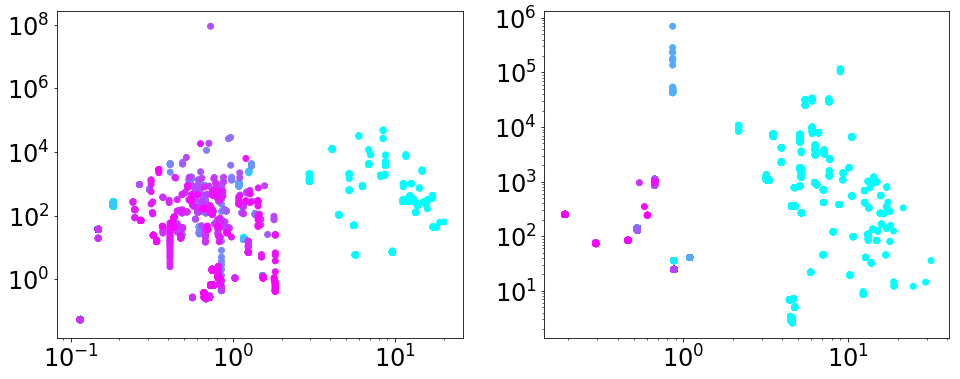

In [25]:
##M-Porb plot for all the NS-MS binaries in the two new models with tidal capture implemented. 
##Include repeating binary system.
data_rvs=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/8e5rv0.5rg8z0.002/NS_MS_alltimes.dat')
M2_rvs=data_rvs[:,4]; Porb_rvs=data_rvs[:,9]; T_rvs=[i /1000. for i in data_rvs[:,0]]

data_rvl=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/8e5rv1rg8z0.002/NS_MS_alltimes.dat')
M2_rvl=data_rvl[:,4]; Porb_rvl=data_rvl[:,9]; T_rvl=[i /1000. for i in data_rvl[:,0]]

cm = plt.cm.get_cmap('cool')

plt.rcParams['figure.figsize'] = [16,6]
fig, axs=plt.subplots(ncols=2)
for i in range(len(M2_rvs)):
axs[0].scatter(M2_rvs, Porb_rvs, c=T_rvs, cmap=cm)
axs[0].set_xscale('log')
axs[0].set_yscale('log')


sc1=axs[1].scatter(M2_rvl, Porb_rvl, c=T_rvl, cmap=cm)
axs[1].set_xscale('log')
axs[1].set_yscale('log')

#plt.colorbar(sc1)
